In [2]:
# Análise Exploratória
# Nesta aula será feita a análise exploratória de uma base de dados 
# fornecida pela Microsoft denominada AdventureWorks.xlsx

# 1) Mapeamento do Google Drive

# 2) Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 3) Configurando o estilo dos gráficos

plt.style.use("seaborn")

In [4]:
# 4) Fazer o upload do arquivo base via codigo importando o módulo files do Google Colab 

from google.colab import files
arq = files.upload()

# O arquivo escolhido será mostrado no menu vertical lateral Files
# Este é um arquivo temporário que será excluído ao se desconectar

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [5]:
# 5) Criando o DataFrame 

df = pd.read_excel("AdventureWorks.xlsx")

In [6]:
# 6) Visualizando as cinco primeiras linhas

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
# 7) Visualizando o tamanho da tabela: 904 linhas e 16 colunas

df.shape

(904, 16)

In [8]:
# 8) Verificando o tipo de dados de cada coluna

df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Iniciando a análise

In [9]:
# Qual foi a receita total

df["Valor Venda"].sum()

5984606.1426

In [10]:
# Qual o custo total?

# Para isso devemos criar uma coluna 'Custo' que irá receber o o valor da coluna Preço Unitário vezes a coluna Quantidade

df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [11]:
# Visualizando a tabela após inserção da nova coluna 'Custo'

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [12]:
# Agora pode-se calcular o custo total: df["Custo"].sum() ==> Foi usado o método 
# round para apresentar o resultado com duas casas decimais

round(df["Custo"].sum(),2)

2486783.05

In [13]:
# Como calcular o Lucro Total?

# Primeiro: Cria a coluna Lucro que conterá a Receita - Custo ==> df(["Lucro"]) = df["Valor Venda"] - df["Custo"]
# Lembrando que a coluna Valor Venda já é a Receita (Custo Unitário * Quantidade)

df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [14]:
# Visualizando a coluna 'Lucro' criada

df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [15]:
# Finalmente podemos calcular o Lucro total com df["Lucro"].sum() e arredondar o resultado com round 

round(df["Lucro"].sum(),2)

3497823.09

In [16]:
# Criando uma coluna com total de dias para enviar o produto

df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [17]:
# Visualizando

df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


Obtendo o tempo médio de envio para cada marca

In [18]:
# Para isso é necessário transformar a coluna Tempo_envio em numérica
# Observe que a coluna 'Tempo_envio' é uma string ("20 days") e por isso deve ser
# convetida para numérica

df.dtypes

Data Venda         datetime64[ns]
Data Envio         datetime64[ns]
ID Loja                     int64
ID Produto                  int64
ID Cliente                  int64
No. Venda                  object
Custo Unitário            float64
Preço Unitário            float64
Quantidade                  int64
Valor Desconto            float64
Valor Venda               float64
Produto                    object
Fabricante                 object
Marca                      object
Classe                     object
Cor                        object
Custo                     float64
Lucro                     float64
Tempo_envio       timedelta64[ns]
dtype: object

In [19]:
# Extraindo apenas os dias do tempo de envio

df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [20]:
# Vizualizando

df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [21]:
# Agora como a coluna Tempo_envio é numérica será possível realizar operações matemáticas.
# Verificando do tipo de dados da coluna

df["Tempo_envio"].dtype

dtype('int64')

In [22]:
# Agrupando tempo de envio e marca 

df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

Verificar valores ausentes no DataFrame

In [23]:
# Verificando valores ausentes no df

df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

Obtendo o 'Lucro' por 'Ano' e por 'Marca'

In [24]:
# Agrupando nosso dataframe por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [25]:
# Apresentando o resultado formatado e não em potência de 10
# Neste caso a virgula é separador de milhar e o ponto é separador decimal

pd.options.display.float_format = '{:20.2f}'.format

In [26]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works              306641.16
            Contoso                       56416.00
            Fabrikam                    1557020.55
2009        Adventure Works              405395.08
            Contoso                      138258.95
            Fabrikam                    1034091.35
Name: Lucro, dtype: float64

In [27]:
# Resetando o index para apresentar os dados em formato colunar (sem indexação pelo ano)

lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,306641.16
1,2008,Contoso,56416.00
2,2008,Fabrikam,1557020.55
3,2009,Adventure Works,405395.08
4,2009,Contoso,138258.95
5,2009,Fabrikam,1034091.35


In [28]:
# Pesquisar: Qual o total de produtos vendidos?

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

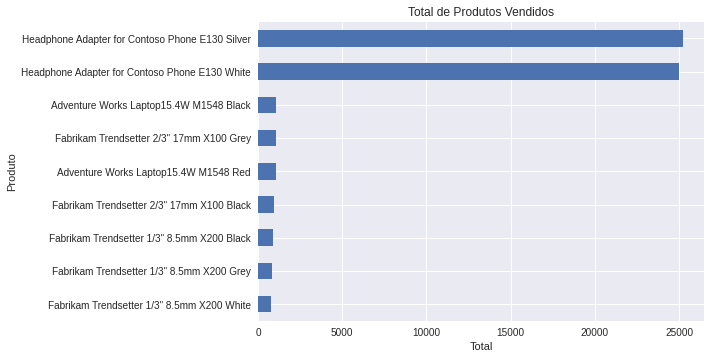

In [29]:
# Plotando o Gráfico Total de Produtos Vendidos para a tabela acima

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

In [30]:
# Outra pesquisa importante é a de Lucro x Ano

df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008             1920077.71
2009             1577745.38
Name: Lucro, dtype: float64

Text(0, 0.5, 'Lucro')

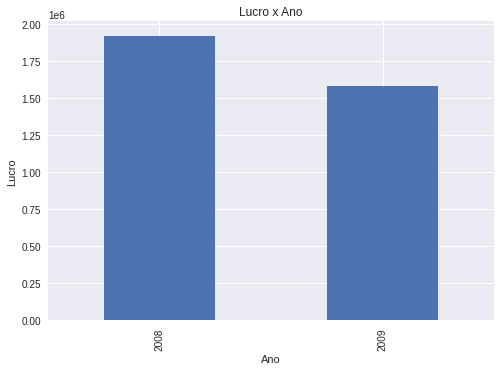

In [31]:
# Plotando em um gráfico Lucro x Ano teremos:

df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title = "Lucro x Ano")
plt.xlabel ("Ano")
plt.ylabel ("Lucro")

In [32]:
# Tabela do Gráfico acima em formato tabular (sem indexação)

quantidade_produto = df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().reset_index()
quantidade_produto

,Data Venda,Lucro
0,2008,1920077.71
1,2009,1577745.38


In [33]:
# Criando um novo dataframe e selecionando somente as vendas de 2009

df_2009 = df[df["Data Venda"].dt.year ==2009]
df_2009.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,12


In [34]:
df_2009.tail(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
896,2009-03-04,2009-03-15,307,1155,19117,200903044CS706,324.69,980.00,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,2755.86,11
897,2009-06-12,2009-06-22,307,1226,19126,200906124CS716,330.99,999.00,6,599.40,5394.60,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94,3408.66,10
898,2009-06-25,2009-07-06,307,1155,19127,200906254CS717,324.69,980.00,6,588.00,5292.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,3343.86,11


In [35]:
# Agrupando e plotando o Lucro por mês deste novo dataframe de 2009 (Maior granularidade)

Text(0, 0.5, 'Lucro')

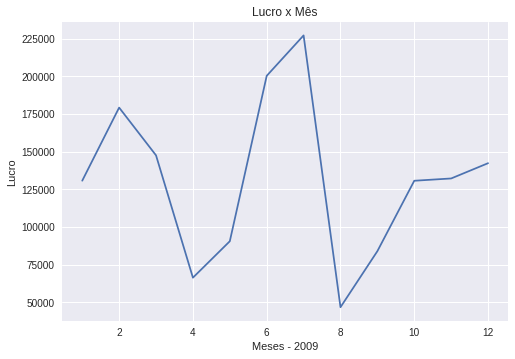

In [36]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title = "Lucro x Mês")
plt.xlabel("Meses - 2009")
plt.ylabel("Lucro")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

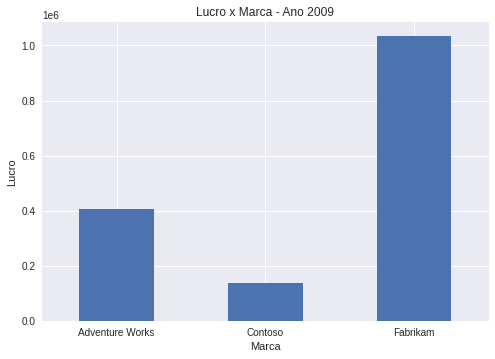

In [37]:
# Usando o mesmo dataframe de 2009 vamos plotar o gráfico de Lucro x Marca para o ano de 2009

df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title = "Lucro x Marca - Ano 2009")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

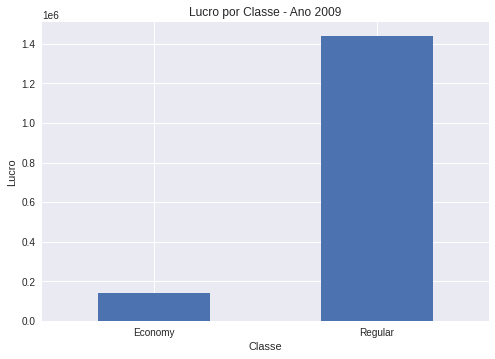

In [39]:
# Pesquisando o Lucro x Classe

df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title = "Lucro por Classe - Ano 2009")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal")

#Análises Estatísticas

In [40]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

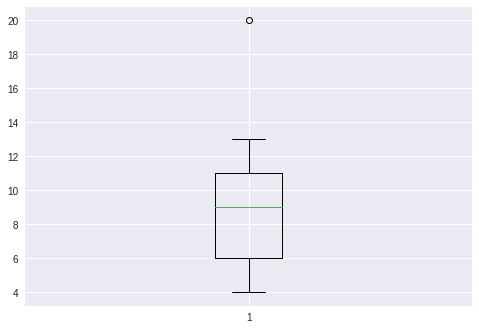

In [42]:
# Gráfico de boxplot
# Nesse gráfico são apresentados pontos importantes da análise como valores máximos e mínimos,
# mediana, quartil, P3 (75%) e o outlier (valor mais discrepante ou um ponto influente)

plt.boxplot(df["Tempo_envio"]);

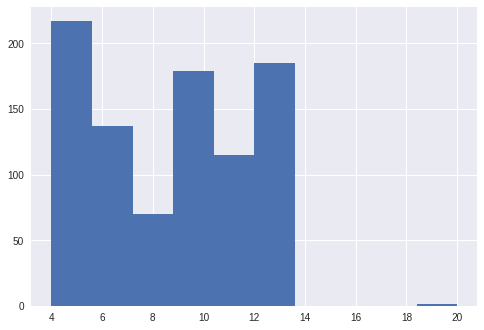

In [43]:
# Histograma para a análise do tempo de envio

plt.hist(df["Tempo_envio"]);

In [44]:
# Confirmando os  valores apresentados pelo método describe() para valor minimo

df["Tempo_envio"].min()

4

In [45]:
# Confirmando os  valores apresentados pelo método describe() para valor maximo

df["Tempo_envio"].max()

20

In [46]:
# Identificando a Venda referente ao ponto com tempo de envio discrepante de 20

df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [48]:
# Para finalizar a Análise devemos salvar os resultados em formato csv e exportá-lo para o Excel

df.to_csv(r"C:\Users\Public\Aipl\Bootcamps\DIO\UnimedBH\dio-tech-unimedbh\python\projects\chalenge-01\df_vendas_analisado.csv", index=False)